In [1]:
import os
import sys
root_dir= os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../data/raw/data2.csv')
df.head(5)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [4]:
# 3. Feature Engineering
def create_features(df):
    # Copia para no modificar el original
    df_features = df.copy()
    
    # Features basados en Income
    df_features['income_category'] = pd.qcut(df['Income'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
    df_features['income_to_profession_mean'] = df['Income'] / df.groupby('Profession')['Income'].transform('mean')
    df_features['income_std_from_mean'] = (df['Income'] - df['Income'].mean()) / df['Income'].std()
    
    # Features basados en Security Code
    df_features['security_code_length'] = df['Security_code'].astype(str).str.len()
    df_features['security_code_starts_with'] = df['Security_code'].astype(str).str[0]
    
    # Features basados en Expiry
    df_features['expiry_year'] = df['Expiry'].str[:2].astype(int)
    df_features['expiry_month'] = df['Expiry'].str[3:].astype(int)
    
    return df_features

# 4. Aplicar feature engineering
df_with_features = create_features(df)

# 3. Feature Engineering
def create_features(df):
    # Copia para no modificar el original
    df_features = df.copy()
    
    # Features basados en Income
    df_features['income_category'] = pd.qcut(df['Income'], q=5, 
                                           labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
    df_features['income_to_profession_mean'] = df['Income'] / df.groupby('Profession')['Income'].transform('mean')
    df_features['income_std_from_mean'] = (df['Income'] - df['Income'].mean()) / df['Income'].std()
    
    # Features basados en Security Code
    df_features['security_code_length'] = df['Security_code'].astype(str).str.len()
    df_features['security_code_starts_with'] = df['Security_code'].astype(str).str[0]
    
    # Features basados en Expiry
    df_features['expiry_year'] = df['Expiry'].str[:2].astype(int)
    df_features['expiry_month'] = df['Expiry'].str[3:].astype(int)
    
    return df_features

# 4. Aplicar feature engineering
df_with_features = create_features(df)

# 5. Visualizar nuevas características
print("Nuevas características creadas:")
print(df_with_features.columns.tolist())

Nuevas características creadas:
['Profession', 'Income', 'Credit_card_number', 'Expiry', 'Security_code', 'Fraud', 'income_category', 'income_to_profession_mean', 'income_std_from_mean', 'security_code_length', 'security_code_starts_with', 'expiry_year', 'expiry_month']


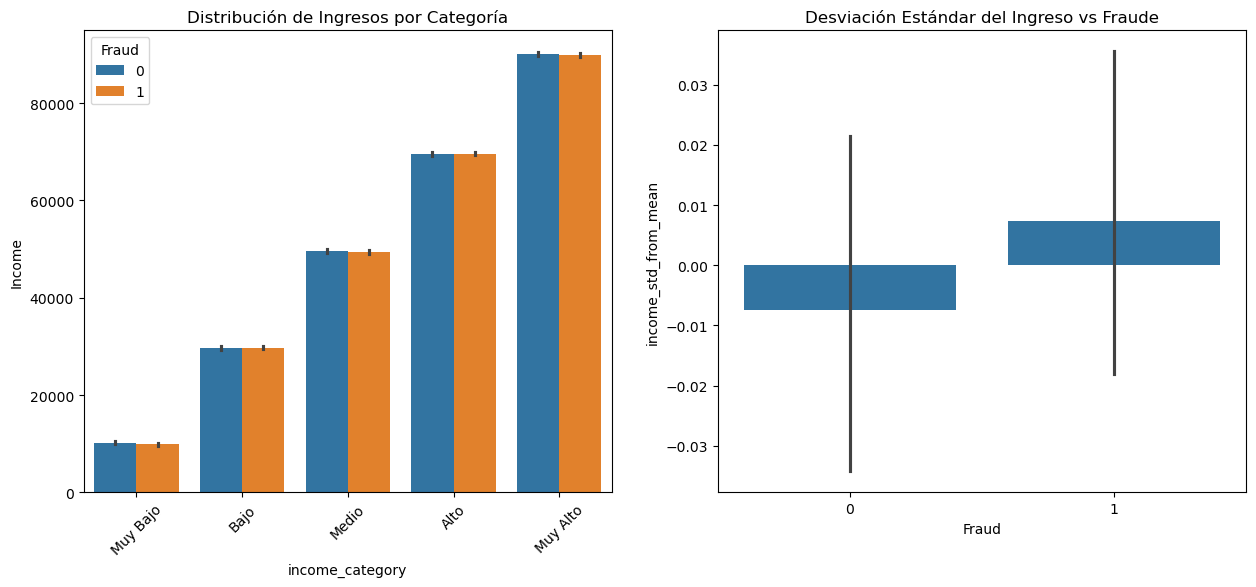

In [5]:
# 6. Análisis de las nuevas características
plt.figure(figsize=(15, 6))

# Distribución de ingresos por categoría
plt.subplot(1, 2, 1)
sns.barplot(data=df_with_features, x='income_category', y='Income', hue='Fraud')
plt.title('Distribución de Ingresos por Categoría')
plt.xticks(rotation=45)

# Relación entre income_std_from_mean y fraude
plt.subplot(1, 2, 2)
sns.barplot(data=df_with_features, x='Fraud', y='income_std_from_mean')
plt.title('Desviación Estándar del Ingreso vs Fraude')

plt.show()

In [6]:
# 1. Primero crear las columnas de fecha
df['expiry_year'] = df['Expiry'].str[:2].astype(int)
df['expiry_month'] = df['Expiry'].str[3:].astype(int)

# 2. Ahora crear todas las nuevas características
df['income_to_security_ratio'] = df['Income'] / df['Security_code']
df['income_percentile'] = pd.qcut(df['Income'], q=10, labels=False)
df['months_to_expire'] = df['expiry_year']*12 + df['expiry_month']
df['income_to_profession_mean'] = df.groupby('Profession')['Income'].transform('mean')
df['income_to_profession_ratio'] = df['Income'] / df['income_to_profession_mean']

C:\Users\leona\AppData\Local\Temp\ipykernel_6984\4267973593.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)


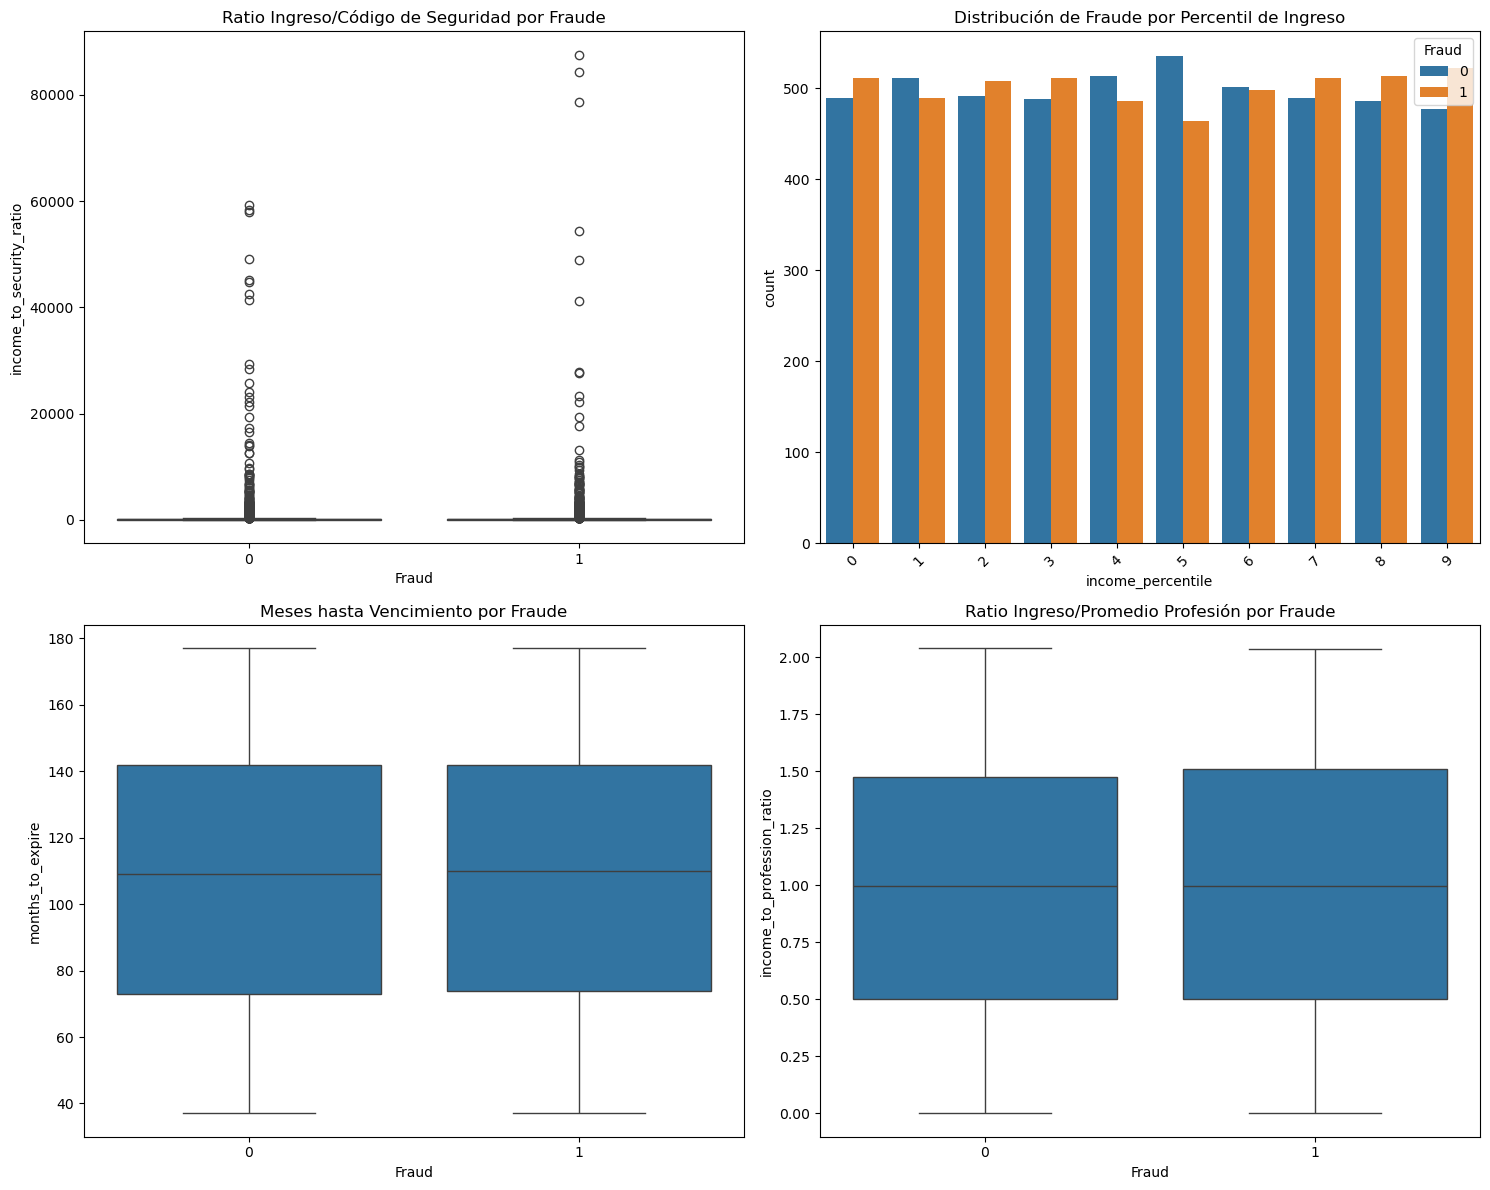


Correlaciones con Fraud:
income_to_security_ratio     -0.003590
months_to_expire              0.005383
income_to_profession_ratio    0.006823
income_percentile             0.008147
Fraud                         1.000000
Name: Fraud, dtype: float64


In [7]:
# Crear subplots para visualizar
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Income to Security Ratio vs Fraud
sns.boxplot(data=df, x='Fraud', y='income_to_security_ratio', ax=axes[0,0])
axes[0,0].set_title('Ratio Ingreso/Código de Seguridad por Fraude')

# 2. Income Percentile vs Fraud
sns.countplot(data=df, x='income_percentile', hue='Fraud', ax=axes[0,1])
axes[0,1].set_title('Distribución de Fraude por Percentil de Ingreso')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

# 3. Months to Expire vs Fraud
sns.boxplot(data=df, x='Fraud', y='months_to_expire', ax=axes[1,0])
axes[1,0].set_title('Meses hasta Vencimiento por Fraude')

# 4. Income to Profession Ratio vs Fraud
sns.boxplot(data=df, x='Fraud', y='income_to_profession_ratio', ax=axes[1,1])
axes[1,1].set_title('Ratio Ingreso/Promedio Profesión por Fraude')

plt.tight_layout()
plt.show()

# Mostrar correlaciones con Fraud
correlations = df[['Fraud', 'income_to_security_ratio', 'income_percentile', 
                  'months_to_expire', 'income_to_profession_ratio']].corr()['Fraud'].sort_values()
print("\nCorrelaciones con Fraud:")
print(correlations)

In [8]:
regiones= {
    'Norte': 0.3,
    'Sur': 0.4,
    'Este': 0.5,
    'Oeste': 0.2,
    'Centro': 0.6
}

#asignamos regiones segun niveles de riesgo

n_samples = len(df)
df['region'] = np.random.choice(list(regiones.keys()), size=n_samples)
df['risk_level'] = df['region'].map(regiones)

# Distancia simulada entre dirección de facturación y compra
df['transaction_distance'] = np.random.exponential(scale=50, size=n_samples)  # en km

In [9]:
df.head(3)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,expiry_year,expiry_month,income_to_security_ratio,income_percentile,months_to_expire,income_to_profession_mean,income_to_profession_ratio,region,risk_level,transaction_distance
0,DOCTOR,42509,3515418493460774,07/25,251,1,7,25,169.358566,4,109,50201.829239,0.846762,Norte,0.3,32.011589
1,DOCTOR,80334,213134223583196,05/32,858,1,5,32,93.629371,8,92,50201.829239,1.600221,Norte,0.3,5.056628
2,LAWYER,91552,4869615013764888,03/30,755,1,3,30,121.260927,9,66,50064.170092,1.828693,Norte,0.3,43.302579


In [10]:
# Patrones de transacciones
df['monthly_transactions'] = np.random.poisson(lam=15, size=n_samples)  # número promedio de transacciones
df['avg_monthly_spend'] = df['Income'] * np.random.uniform(0.1, 0.3, size=n_samples)  # 10-30% del ingreso

# Categorías de comercios frecuentes
comercios = ['Retail', 'Restaurant', 'Travel', 'Online', 'Services']
df['main_merchant_category'] = np.random.choice(comercios, size=n_samples)

# Crear patrones de comportamiento
df['unusual_activity_score'] = (
    (df['monthly_transactions'] > df['monthly_transactions'].quantile(0.75)).astype(int) * 0.3 +
    (df['transaction_distance'] > df['transaction_distance'].quantile(0.75)).astype(int) * 0.4 +
    (df['avg_monthly_spend'] > df['avg_monthly_spend'].quantile(0.75)).astype(int) * 0.3
)

df.head(3)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,expiry_year,expiry_month,income_to_security_ratio,income_percentile,months_to_expire,income_to_profession_mean,income_to_profession_ratio,region,risk_level,transaction_distance,monthly_transactions,avg_monthly_spend,main_merchant_category,unusual_activity_score
0,DOCTOR,42509,3515418493460774,07/25,251,1,7,25,169.358566,4,109,50201.829239,0.846762,Norte,0.3,32.011589,8,10930.318932,Retail,0.0
1,DOCTOR,80334,213134223583196,05/32,858,1,5,32,93.629371,8,92,50201.829239,1.600221,Norte,0.3,5.056628,17,9265.551585,Travel,0.0
2,LAWYER,91552,4869615013764888,03/30,755,1,3,30,121.260927,9,66,50064.170092,1.828693,Norte,0.3,43.302579,15,9477.963635,Restaurant,0.0


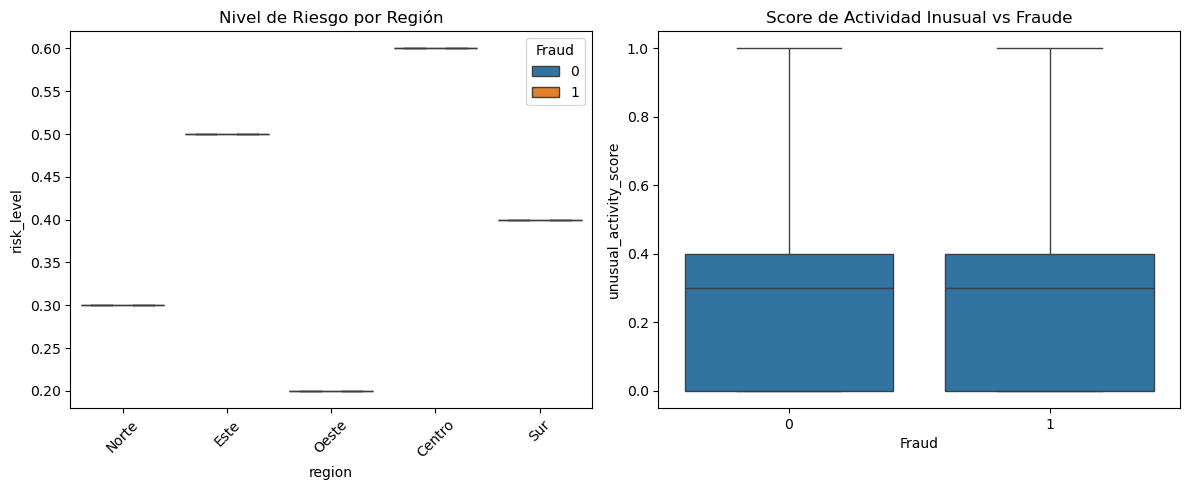


Correlaciones con Fraud:
risk_level               -0.017864
transaction_distance     -0.009366
monthly_transactions      0.001662
unusual_activity_score    0.005626
avg_monthly_spend         0.012112
Fraud                     1.000000
Name: Fraud, dtype: float64


In [11]:
# Visualizar distribución de riesgo por región
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='region', y='risk_level', hue='Fraud')
plt.title('Nivel de Riesgo por Región')
plt.xticks(rotation=45)

# Visualizar score de actividad inusual
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Fraud', y='unusual_activity_score')
plt.title('Score de Actividad Inusual vs Fraude')

plt.tight_layout()
plt.show()

# Mostrar correlaciones
new_features = ['risk_level', 'transaction_distance', 'monthly_transactions', 
                'avg_monthly_spend', 'unusual_activity_score']
correlations = df[['Fraud'] + new_features].corr()['Fraud'].sort_values()
print("\nCorrelaciones con Fraud:")
print(correlations)

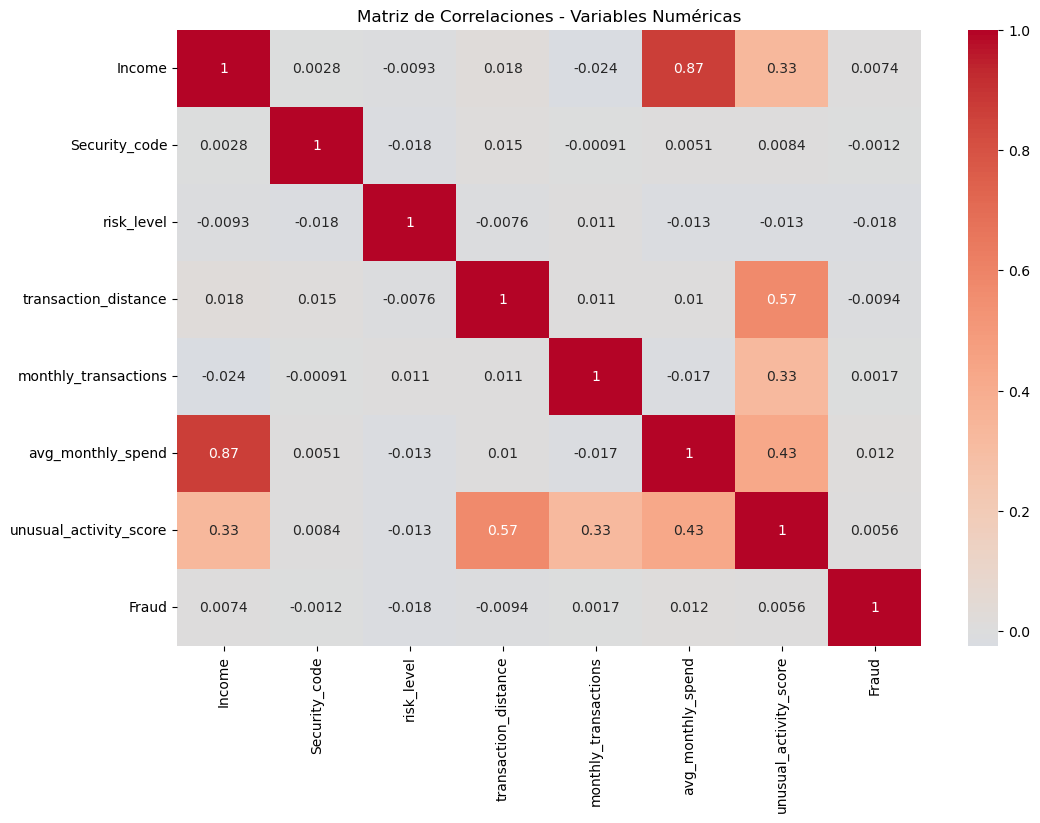


Correlaciones con Fraud ordenadas:
Fraud                     1.000000
avg_monthly_spend         0.012112
Income                    0.007364
unusual_activity_score    0.005626
monthly_transactions      0.001662
Security_code            -0.001246
transaction_distance     -0.009366
risk_level               -0.017864
Name: Fraud, dtype: float64


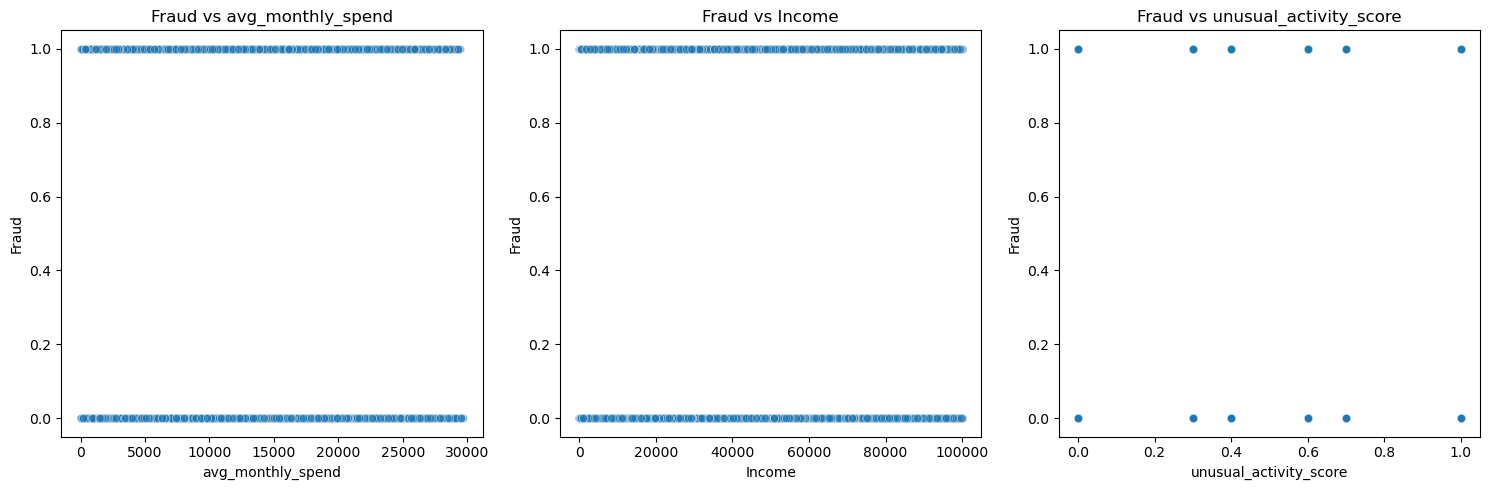

In [12]:
# Seleccionar solo variables numéricas incluyendo las nuevas
numeric_columns = ['Income', 'Security_code', 'risk_level', 'transaction_distance', 
                  'monthly_transactions', 'avg_monthly_spend', 'unusual_activity_score', 'Fraud']

# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones - Variables Numéricas')
plt.show()

# Correlaciones específicas con Fraud
fraud_correlations = correlation_matrix['Fraud'].sort_values(ascending=False)
print("\nCorrelaciones con Fraud ordenadas:")
print(fraud_correlations)

# Visualizaciones adicionales para las correlaciones más fuertes
plt.figure(figsize=(15, 5))

# Top 3 correlaciones más fuertes (excluyendo Fraud con sí mismo)
top_corrs = fraud_correlations[1:4].index

for i, feature in enumerate(top_corrs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=feature, y='Fraud', alpha=0.5)
    plt.title(f'Fraud vs {feature}')

plt.tight_layout()
plt.show()

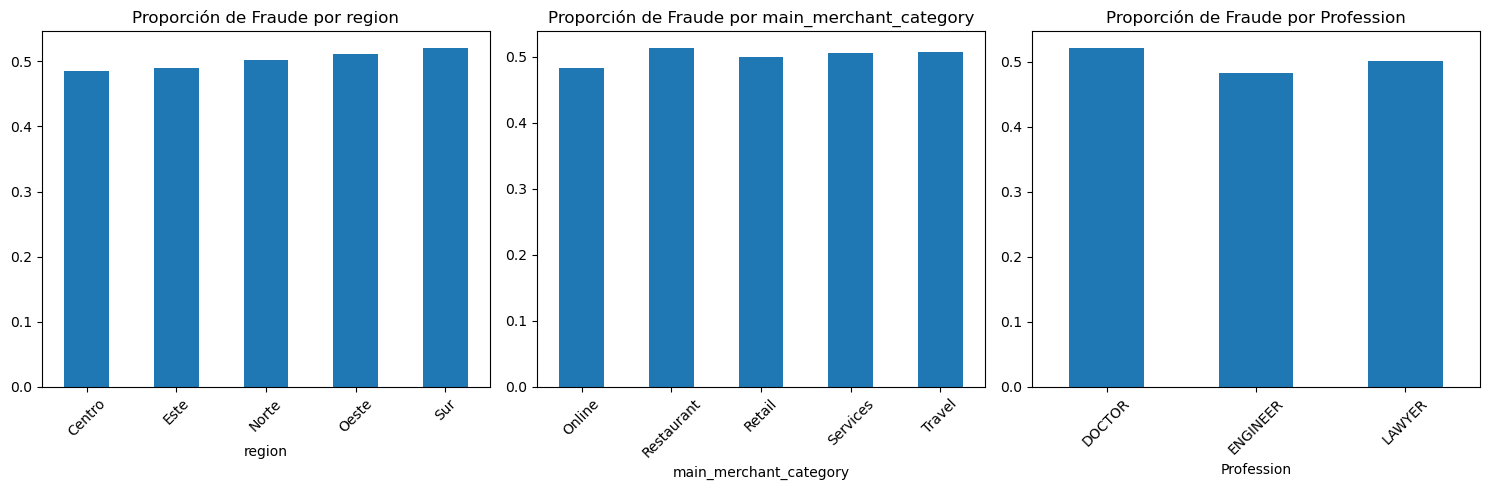


Test Chi-cuadrado para variables categóricas:

region:
Chi2: 6.66
p-value: 0.1549

main_merchant_category:
Chi2: 4.12
p-value: 0.3903

Profession:
Chi2: 9.47
p-value: 0.0088

Tablas de contingencia (%):

region:
Fraud           0          1
region                      
Centro  51.518168  48.481832
Este    50.944334  49.055666
Norte   49.799800  50.200200
Oeste   48.936170  51.063830
Sur     47.982063  52.017937

main_merchant_category:
Fraud                           0          1
main_merchant_category                      
Online                  51.703407  48.296593
Restaurant              48.734818  51.265182
Retail                  50.000000  50.000000
Services                49.465104  50.534896
Travel                  49.286768  50.713232

Profession:
Fraud               0          1
Profession                      
DOCTOR      47.943178  52.056822
ENGINEER    51.715686  48.284314
LAWYER      49.925529  50.074471


In [13]:
# 1. Análisis de variables categóricas
categorical_columns = ['region', 'main_merchant_category', 'Profession']

# Crear visualizaciones
plt.figure(figsize=(15, 5))

# Para cada variable categórica
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    
    # Calcular proporción de fraude por categoría
    fraud_prop = df.groupby(col)['Fraud'].mean()
    fraud_prop.plot(kind='bar')
    plt.title(f'Proporción de Fraude por {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Chi-square test para independencia
from scipy.stats import chi2_contingency

print("\nTest Chi-cuadrado para variables categóricas:")
for col in categorical_columns:
    contingency = pd.crosstab(df[col], df['Fraud'])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\n{col}:")
    print(f"Chi2: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")
    
# 3. Mostrar tablas de contingencia con porcentajes
print("\nTablas de contingencia (%):")
for col in categorical_columns:
    cont_table = pd.crosstab(df[col], df['Fraud'], normalize='index') * 100
    print(f"\n{col}:")
    print(cont_table)

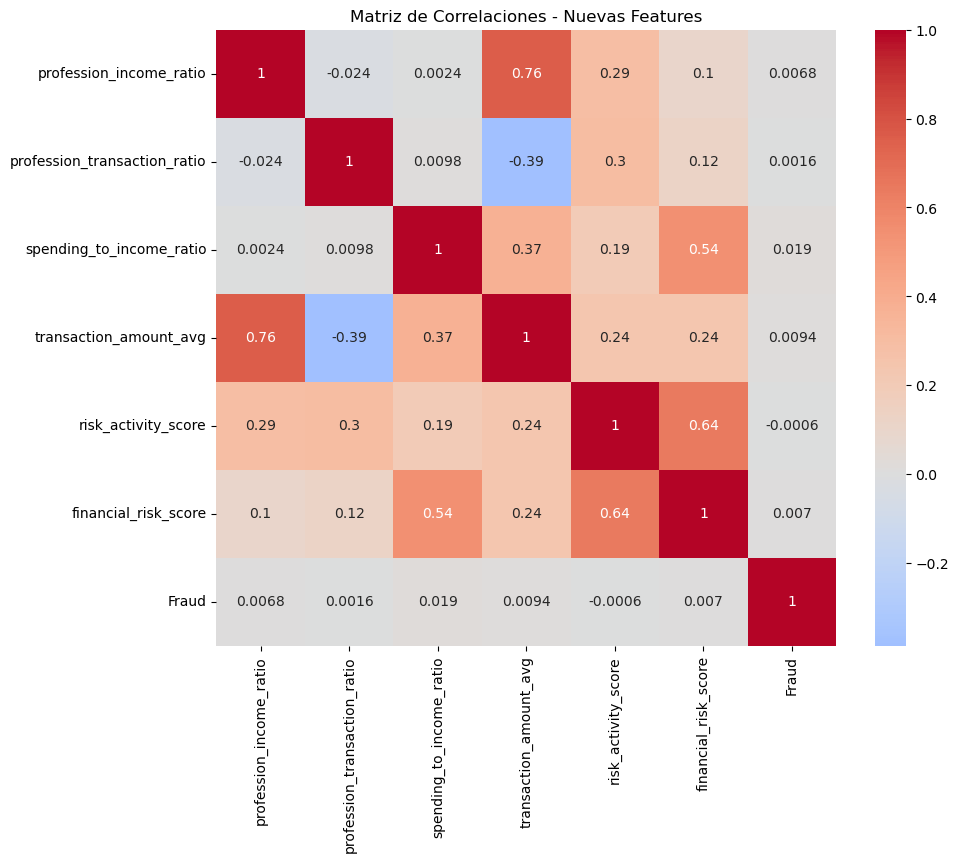


Correlaciones con Fraud ordenadas:
Fraud                           1.000000
spending_to_income_ratio        0.018508
transaction_amount_avg          0.009377
financial_risk_score            0.007034
profession_income_ratio         0.006823
profession_transaction_ratio    0.001623
risk_activity_score            -0.000596
Name: Fraud, dtype: float64


In [14]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# 1. Combinaciones con Profession (que ya sabemos que es significativa)
# Primero convertimos Profession a numérica si no lo está
df['Profession_encoded'] = le.fit_transform(df['Profession'])

# Crear nuevas features combinadas
df['profession_income_ratio'] = df['Income'] / df.groupby('Profession')['Income'].transform('mean')
df['profession_transaction_ratio'] = df['monthly_transactions'] / df.groupby('Profession')['monthly_transactions'].transform('mean')

# 2. Ratios y combinaciones de actividad
df['spending_to_income_ratio'] = df['avg_monthly_spend'] / df['Income']
df['transaction_amount_avg'] = df['avg_monthly_spend'] / df['monthly_transactions']
df['risk_activity_score'] = df['risk_level'] * df['unusual_activity_score']

# 3. Scores compuestos
df['financial_risk_score'] = (
    (df['spending_to_income_ratio'] > df['spending_to_income_ratio'].quantile(0.75)).astype(int) * 0.4 +
    (df['transaction_distance'] > df['transaction_distance'].quantile(0.75)).astype(int) * 0.3 +
    (df['unusual_activity_score'] > df['unusual_activity_score'].quantile(0.75)).astype(int) * 0.3
)

# Visualizar nuevas correlaciones
new_features = [
    'profession_income_ratio',
    'profession_transaction_ratio',
    'spending_to_income_ratio',
    'transaction_amount_avg',
    'risk_activity_score',
    'financial_risk_score',
    'Fraud'
]

# Matriz de correlación para las nuevas features
plt.figure(figsize=(10, 8))
correlation_matrix = df[new_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones - Nuevas Features')
plt.show()

# Mostrar correlaciones con Fraud ordenadas
print("\nCorrelaciones con Fraud ordenadas:")
print(correlation_matrix['Fraud'].sort_values(ascending=False))

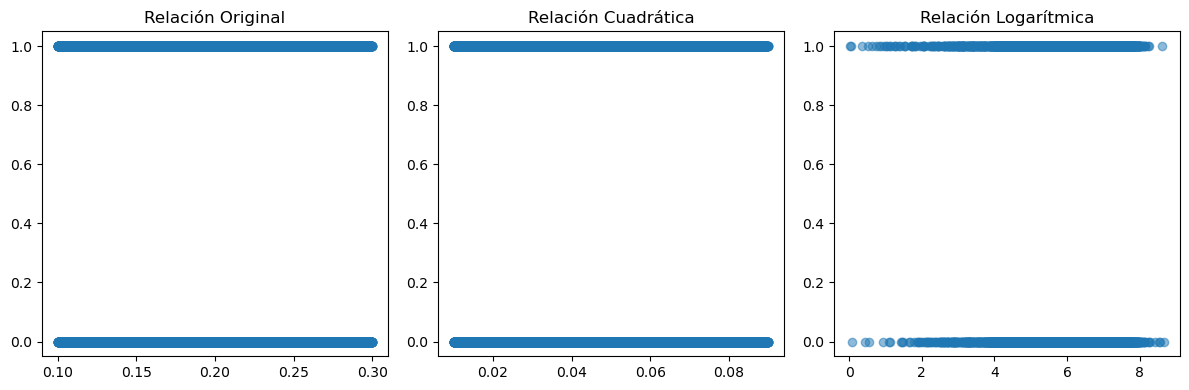

In [15]:
# Crear transformaciones no lineales de nuestras features
df['spending_ratio_squared'] = df['spending_to_income_ratio']**2
df['log_transaction_amount'] = np.log1p(df['transaction_amount_avg'])
df['exp_risk_score'] = np.exp(df['risk_activity_score'])

# Visualizar
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df['spending_to_income_ratio'], df['Fraud'], alpha=0.5)
plt.title('Relación Original')

plt.subplot(1, 3, 2)
plt.scatter(df['spending_ratio_squared'], df['Fraud'], alpha=0.5)
plt.title('Relación Cuadrática')

plt.subplot(1, 3, 3)
plt.scatter(df['log_transaction_amount'], df['Fraud'], alpha=0.5)
plt.title('Relación Logarítmica')

plt.tight_layout()
plt.show()

### VEO UNA CARACTERISTICA DE PARA USO DE FUNCIONES ESCALON Y SIGMOIDES, USUALMENTE UTILIZADAS PARA LA CLASIFICACION BINARIA.
### YO QUIERO ENCONTRAR LAS MEJORES CARACTERISTICAS PARA MEJORAR EL RENDIMIENTO DE MIS MODELOS

In [18]:
from sklearn.model_selection import train_test_split

# Crear las nuevas features
df['risk_score_sigmoid'] = 1 / (1 + np.exp(-df['risk_activity_score']))
df['financial_risk_score'] = (
    (df['spending_to_income_ratio'] > df['spending_to_income_ratio'].quantile(0.75)).astype(int) * 0.4 +
    (df['transaction_distance'] > df['transaction_distance'].quantile(0.75)).astype(int) * 0.3 +
    (df['unusual_activity_score'] > df['unusual_activity_score'].quantile(0.75)).astype(int) * 0.3
)

# Verificar las columnas disponibles
print("Columnas en el DataFrame:")
print(df.columns.tolist())

# Ahora sí, seleccionar features para el modelo
X = df[['risk_score_sigmoid', 'financial_risk_score', 'profession_income_ratio', 
        'spending_to_income_ratio', 'risk_activity_score']]
y = df['Fraud']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Columnas en el DataFrame:
['Profession', 'Income', 'Credit_card_number', 'Expiry', 'Security_code', 'Fraud', 'expiry_year', 'expiry_month', 'income_to_security_ratio', 'income_percentile', 'months_to_expire', 'income_to_profession_mean', 'income_to_profession_ratio', 'region', 'risk_level', 'transaction_distance', 'monthly_transactions', 'avg_monthly_spend', 'main_merchant_category', 'unusual_activity_score', 'Profession_encoded', 'profession_income_ratio', 'profession_transaction_ratio', 'spending_to_income_ratio', 'transaction_amount_avg', 'risk_activity_score', 'financial_risk_score', 'spending_ratio_squared', 'log_transaction_amount', 'exp_risk_score', 'risk_score_sigmoid']


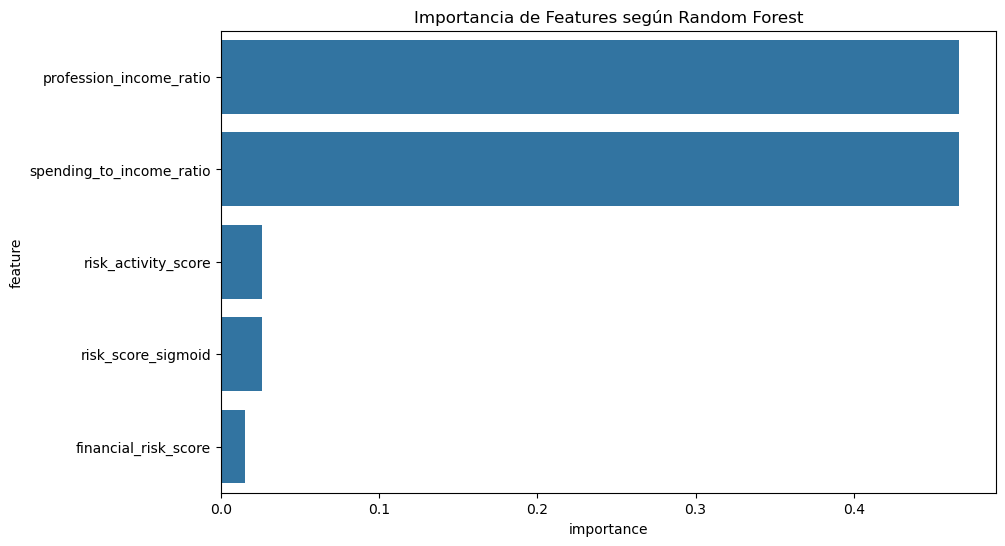

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Obtener importancia de features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de Features según Random Forest')
plt.show()

In [21]:
# Features seleccionadas
selected_features = [
    'profession_income_ratio',
    'spending_to_income_ratio',
    'Profession_encoded',  # Recordar codificar Profession
    'unusual_activity_score',
    'transaction_distance'
]

# Preparar datos para modelado
X = df[selected_features]
y = df['Fraud']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Definir los modelos
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight='balanced'
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1
    ),
    'SVM': SVC(
        kernel='rbf',
        probability=True
    )
}

# Entrenar y evaluar modelos
results = []
for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    # Predecir
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    metrics = {
        'Modelo': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_pred)
    }
    results.append(metrics)

# Crear DataFrame con resultados
df_results = pd.DataFrame(results)
df_results = df_results.sort_values('Precision', ascending=False)
print("\nResultados ordenados por Precisión:")
print(df_results.round(4))


Resultados ordenados por Precisión:
          Modelo  Accuracy  Precision  Recall      F1  ROC_AUC
2            SVM     0.515     0.5137  0.6507  0.5742   0.5143
1        XGBoost     0.504     0.5063  0.5194  0.5128   0.5039
0  Random Forest     0.493     0.4950  0.4398  0.4658   0.4933


### El trabajo de de featrure ingenner que hay que hacer es casi de completar con mas informacion para enriquecer los modelos, ya que los datos estan creados y eso impide la representacion de un modelo matematico

### Vamos a agregar mas variables al dataframe original y realizar unas nuevas visualizaciones de correlaciones 

In [5]:
df.head(3)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1


In [7]:
# Patrones temporales para agregar una ruta de seguimiento
df['hora_transaccion'] = np.random.randint(0, 24, size=len(df))
df['dia_semana'] = np.random.randint(1, 8, size=len(df))
df['es_fin_semana'] = df['dia_semana'].isin([6,7]).astype(int)
df.head(3)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,hora_transaccion,dia_semana,es_fin_semana
0,DOCTOR,42509,3515418493460774,07/25,251,1,2,4,0
1,DOCTOR,80334,213134223583196,05/32,858,1,2,5,0
2,LAWYER,91552,4869615013764888,03/30,755,1,3,6,1


In [8]:
# Patrones de gasto
df['monto_gastos'] = df['Income'] * np.random.uniform(0.1, 0.4, size=len(df))
df['cantidad_gastos'] = np.random.poisson(lam=15, size=len(df))
df['gasto_promedio'] = df['monto_gastos'] / df['cantidad_gastos']
df.head(3)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,hora_transaccion,dia_semana,es_fin_semana,monto_gastos,cantidad_gastos,gasto_promedio
0,DOCTOR,42509,3515418493460774,07/25,251,1,2,4,0,8191.884012,21,390.089715
1,DOCTOR,80334,213134223583196,05/32,858,1,2,5,0,18804.959520,14,1343.211394
2,LAWYER,91552,4869615013764888,03/30,755,1,3,6,1,21458.862818,16,1341.178926


In [10]:
# Ubicaciones
ubicaciones = ['Shopping', 'Restaurant', 'Online', 'ATM', 'Travel']
df['ubicacion_gastos'] = np.random.choice(ubicaciones, size=len(df))
df['distancia_usual'] = np.random.exponential(50, size=len(df))

In [11]:
# Patrones de riesgo
df['frecuencia_inusual'] = (df['cantidad_gastos'] > df['cantidad_gastos'].quantile(0.75)).astype(int)
df['monto_inusual'] = (df['monto_gastos'] > df['monto_gastos'].quantile(0.75)).astype(int)
df['score_riesgo_ubicacion'] = df['ubicacion_gastos'].map({
    'Shopping': 0.2,
    'Restaurant': 0.1,
    'Online': 0.4,
    'ATM': 0.3,
    'Travel': 0.5,
    })

In [12]:
df.head(3)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,hora_transaccion,dia_semana,es_fin_semana,monto_gastos,cantidad_gastos,gasto_promedio,ubicacion_gastos,distancia_usual,frecuencia_inusual,monto_inusual,score_riesgo_ubicacion
0,DOCTOR,42509,3515418493460774,07/25,251,1,2,4,0,8191.884012,21,390.089715,Restaurant,107.444611,1,0,0.1
1,DOCTOR,80334,213134223583196,05/32,858,1,2,5,0,18804.959520,14,1343.211394,Travel,114.399854,0,1,0.5
2,LAWYER,91552,4869615013764888,03/30,755,1,3,6,1,21458.862818,16,1341.178926,Shopping,115.441664,0,1,0.2


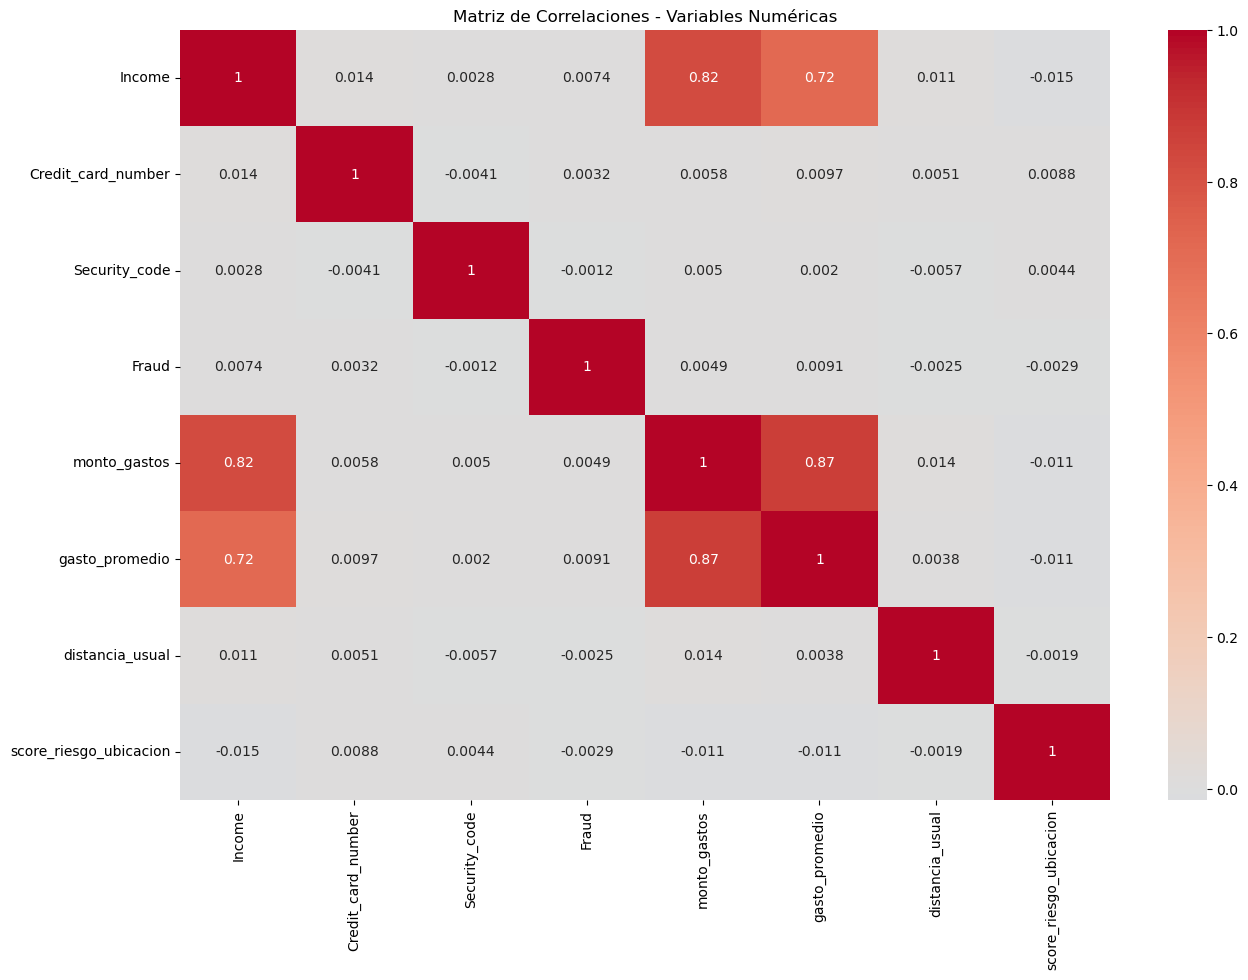


Correlaciones más fuertes con Fraud:
Fraud                     1.000000
gasto_promedio            0.009077
Income                    0.007364
monto_gastos              0.004946
Credit_card_number        0.003155
Security_code            -0.001246
distancia_usual          -0.002513
score_riesgo_ubicacion   -0.002886
Name: Fraud, dtype: float64

Análisis de variables categóricas:

Profession:
Chi2: 9.47
p-value: 0.0088

Expiry:
Chi2: 110.08
p-value: 0.7309

ubicacion_gastos:
Chi2: 0.91
p-value: 0.9233


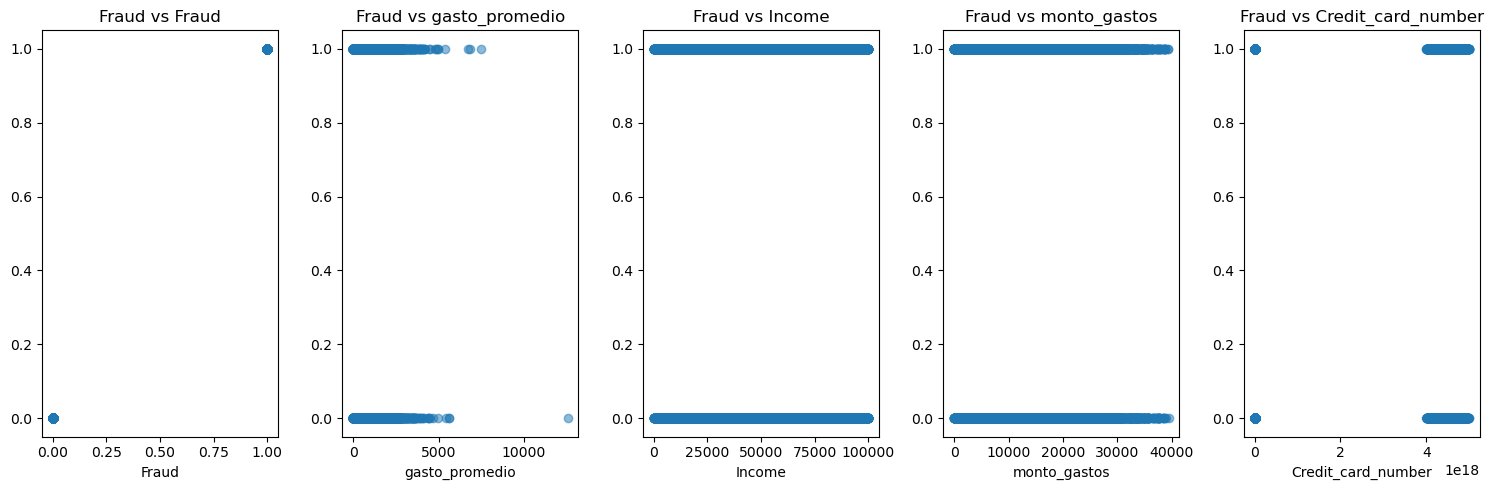

In [13]:
# 1. Separar variables numéricas y categóricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# 2. Análisis de variables numéricas
plt.figure(figsize=(15, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones - Variables Numéricas')
plt.show()

# 3. Mostrar las correlaciones más fuertes con Fraud
print("\nCorrelaciones más fuertes con Fraud:")
fraud_correlations = correlation_matrix['Fraud'].sort_values(ascending=False)
print(fraud_correlations)

# 4. Para variables categóricas
# Usar Chi-cuadrado para medir asociación
from scipy.stats import chi2_contingency

print("\nAnálisis de variables categóricas:")
for col in categorical_columns:
    contingency = pd.crosstab(df[col], df['Fraud'])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\n{col}:")
    print(f"Chi2: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")

# 5. Visualizar las variables más correlacionadas
top_corr_features = fraud_correlations.head(5).index
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_corr_features, 1):
    plt.subplot(1, 5, i)
    plt.scatter(df[feature], df['Fraud'], alpha=0.5)
    plt.title(f'Fraud vs {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()